In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews_beauty=pd.read_parquet('all_beauty2.parquet')
meta_beauty=pd.read_parquet('meta_beauty2.parquet')

Se revisara algunos datos en la categoria Beauty para su analizis se empezara con la metadata

In [3]:
meta_beauty

,asin,title,price,brand,categories,description
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,Ma&#39;s India,[[All Beauty]],The Spirit of Water 16 REUSABLE STATIC CLING W...
1,1030070148,Colored Cosmetic Lens in Twilight Blue,NaN,None,[[All Beauty]],Comfortable and FUN to wear.\nRadiant color th...
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,Helion Communications,[[All Beauty]],HELION TAROT DIVINATION REFERENCE CHART The im...
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,NaN,None,[[All Beauty]],None
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,NaN,None,[[All Beauty]],None
...,...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,NaN,None,[[All Beauty]],"A natural pairing, Organic Extra Virgin Coconu..."
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,None,[[All Beauty]],Maybelline the Provocative Look the Colossal M...
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,onestopmall,[[All Beauty]],Item description: This kind of tie would be pe...
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,NaN,None,[[All Beauty]],A blissfully couple friendly vibe from OhMiBod...


se va a suponer que los precios None son 0 para este primer analisis

In [8]:
meta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6580 entries, 0 to 6579
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asin         6580 non-null   object 
 1   title        6438 non-null   object 
 2   price        6580 non-null   float64
 3   brand        2209 non-null   object 
 4   categories   6580 non-null   object 
 5   description  4836 non-null   object 
dtypes: float64(1), object(5)
memory usage: 308.6+ KB


In [6]:
columna = 'price'
meta_beauty[columna].fillna(0, inplace=True)

In [7]:
meta_beauty

,asin,title,price,brand,categories,description
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,Ma&#39;s India,[[All Beauty]],The Spirit of Water 16 REUSABLE STATIC CLING W...
1,1030070148,Colored Cosmetic Lens in Twilight Blue,0.00,None,[[All Beauty]],Comfortable and FUN to wear.\nRadiant color th...
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,Helion Communications,[[All Beauty]],HELION TAROT DIVINATION REFERENCE CHART The im...
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,0.00,None,[[All Beauty]],None
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,0.00,None,[[All Beauty]],None
...,...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,0.00,None,[[All Beauty]],"A natural pairing, Organic Extra Virgin Coconu..."
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,None,[[All Beauty]],Maybelline the Provocative Look the Colossal M...
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,onestopmall,[[All Beauty]],Item description: This kind of tie would be pe...
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,0.00,None,[[All Beauty]],A blissfully couple friendly vibe from OhMiBod...


En cuanto a reviews se tomara que cada cliente hizo una compra del producto para dejar una reseña

In [10]:
reviews_beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34625 entries, 0 to 34624
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      34625 non-null  object 
 1   asin            34625 non-null  object 
 2   reviewText      34625 non-null  object 
 3   overall         34625 non-null  float64
 4   summary         34625 non-null  object 
 5   unixReviewTime  34625 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


In [12]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_beauty[(reviews_beauty['unixReviewTime'] >= fecha_inicio) & (reviews_beauty['unixReviewTime'] <= fecha_fin)]


In [13]:
df_filtrado

,reviewerID,asin,reviewText,overall,summary,unixReviewTime
0,a1zznihf0ty3p5,0977217213,i like but they are not stickers so they are a...,5.0,great,1397865600
1,a3alvbkmdjnwq9,1030070148,"i mistakenly ordered two sets, i asked if i co...",5.0,colored contat lens,1287187200
2,a1dxtzs7gtw0na,189112966x,what a handy little item. it's chock full of ...,5.0,splendid!!,1346544000
3,a1tyq9p2erhf9v,8950947714,i just like the smell of this shampoo which is...,5.0,i love the smell of this shampoo,1375920000
4,a2l3xc0aivdpka,8985802089,i've been using l'oreal products and tried sev...,5.0,shiseido aquair is good for freezy hair.,1365379200
...,...,...,...,...,...,...
34620,a241ds00ohez1h,b00kpfrv0m,only been using it for about a week can't see ...,4.0,four stars,1405555200
34621,ao3iovo1d3d8g,b00kqrl6au,this scrub leaves you feeling renewed from sho...,5.0,amazing!!,1402444800
34622,a2cvj5c716ckvg,b00krxcbi4,wow! gorgeous tie! price is awesome and went p...,5.0,gorgeous tie,1405209600
34623,a2w389f34ec744,b00kvm9aq2,"it took a while to find a good setting, but i ...",4.0,better than average. but the ring fits ..,1403654400


In [14]:
import pandas as pd

# Supongamos que tienes un DataFrame 'df_meta' con las columnas 'asin', 'title', y 'price',
# y un DataFrame 'df_reviews' con las columnas 'asin' y 'overall'.

# Calcular la cantidad de veces que se repite cada 'asin' en df_reviews
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_beauty[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

# df_final ahora tiene el formato deseado con 'asin', 'title', 'price', 'cantidad', y 'overvall'


In [20]:
df=df_final['cantidad'].dropna()

In [23]:
df_final

,assin,title,price,cantidad,overvall
0,0977217213,Water Blessing Labels Prosperity Collection 16 pc,9.94,1.0,5.0
1,1030070148,Colored Cosmetic Lens in Twilight Blue,0.00,1.0,5.0
2,189112966X,Sacred Wisdom Chart: Tarot Divination,5.99,NaN,0.0
3,8950947714,Shiseido Aquair Shampoo + Conditioner + Treatm...,0.00,1.0,5.0
4,8985802089,Shiseido Aquair Shampoo/Conditioner/Spray SET ...,0.00,1.0,5.0
...,...,...,...,...,...
6575,B00KQRL6AU,Melissa's Virgin Grapefruit Scrub,0.00,NaN,0.0
6576,B00KRR15UA,Maybelline the Provocative Look the Colossal M...,17.99,NaN,0.0
6577,B00KRXCBI4,Dark Red Burgundy Gradient Swirl Paisley Men's...,6.99,NaN,0.0
6578,B00KVM9AQ2,Bedroom Kandi Rise &amp; Shine Vibrating Cock ...,0.00,NaN,0.0


In [24]:
df

0    1.0
1    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    5.0
Name: cantidad, dtype: float64

De Beauty se concluye que las ventas son muy bajas como para tenerlos en cuenta

In [25]:
reviews_fashin=pd.read_parquet('fashion2.parquet')
meta_fashion=pd.read_parquet('meta_Amazon_Fashion2.parquet')

In [27]:
columna = 'price'
meta_fashion[columna].fillna(0, inplace=True)

In [28]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_fashin[(reviews_fashin['unixReviewTime'] >= fecha_inicio) & (reviews_fashin['unixReviewTime'] <= fecha_fin)]

In [29]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_fashion[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)


assin       title                                                                                                                                  price  cantidad  overvall
1880241196  Bird Watching For Kids - A Special Publication from Bird Watcher's Digest                                                              4.50   1.0       1.00        1
9895514328  Italian Dark Green Jade &amp; Gold Plated GF Cross Crucifix Pendant Necklace                                                           3.99   1.0       1.00        1
9895517238  44cm Blue Crystal Beads Silver Plated Rosary Necklace Cross Crucifix with Maria Center From the Holy Land                              5.99   4.0       4.25        1
9895517092  Saint Bead Elastic Bracelet with Religious Icons                                                                                       1.49   1.0       5.00        1
9895516967  Hematite Oval Beads Praying Rosary Necklace Silver Plated Jesus Crucifix &amp; Maria and Baby Jesus Ico

se van a trabajar solo con los que cantidad es distinto de un nulo porque se entiende que en este periodo no se vendio

In [33]:
df_final = df_final.dropna(subset=['cantidad'])


In [37]:
df_final

,assin,title,price,cantidad,overvall,monto_total
0,1880241196,Bird Watching For Kids - A Special Publication...,4.50,1.0,1.00,4.50
1,3890968740,NEW Mango Yellow Mix Colorful Jelly Silicone S...,0.00,1.0,4.00,0.00
2,5555014597,Top Gear Official Merchandise - Top Gear Baseb...,19.50,5.0,5.00,97.50
3,7842955883,Blessed By Pope Benedict XVI St Benedict One-d...,9.99,1.0,1.00,9.99
5,8037200159,Envirosax Kids Series Dogasaurus,0.00,1.0,5.00,0.00
6,9033700042,Envirosax Graphic Series Mikado Pouch with 5 R...,0.00,4.0,4.75,0.00
8,9038900082,Flip and Tumble 24-7 Ball Reusable Shopping Ba...,0.00,2.0,5.00,0.00
9,9564520010,Envirosax Graphic Series Candy Pouch with 5 Re...,0.00,3.0,5.00,0.00
12,9895517238,44cm Blue Crystal Beads Silver Plated Rosary N...,5.99,4.0,4.25,23.96
13,9895515170,Gold Plated GF Green Crystal Beads Rosary Neck...,0.00,1.0,5.00,0.00


In [36]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")


El total vendido en el conjunto de datos es: 30.0
El monto total en dinero es: $151.40


C:\Users\Pedro\AppData\Local\Temp\ipykernel_1736\1166578941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['monto_total'] = df_final['cantidad'] * df_final['price']


Lo vendido en la categoria Fashion es muy bajo y no logra grandes rentabilidad

In [49]:
reviews_Grocery=pd.read_parquet('reviews_Grocery_and_Gourmet_Food2.parquet')
Grocery=pd.read_parquet('meta_Grocery_and_Gourmet_Food2.parquet')

In [50]:
columna = 'price'
Grocery[columna].fillna(0, inplace=True)

In [51]:
Grocery

,asin,description,title,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,[[Grocery & Gourmet Food]],0.00,None
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,[[Grocery & Gourmet Food]],0.00,None
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,[[Grocery & Gourmet Food]],3.99,None
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,[[Grocery & Gourmet Food]],0.00,None
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,[[Grocery & Gourmet Food]],11.99,Mio
...,...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet is extracted from the aromat...,Nescafe Cafe Viet Vietnamese Sweetened Instant...,[[Grocery & Gourmet Food]],17.99,None
171756,B00LMMLRG6,Moon Cheese Snacks Moon Cheese High in protein...,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",[[Grocery & Gourmet Food]],16.95,None
171757,B00LOXAZ1Q,Sour Punch candy is the brand of mouth waterin...,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",[[Grocery & Gourmet Food]],16.55,None
171758,B00LOZ7F0S,"Our Vanilla Extract made from\nPremium, Organi...",Organic Mexican Vanilla,[[Grocery & Gourmet Food]],0.00,None


In [52]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_Grocery[(reviews_Grocery['unixReviewTime'] >= fecha_inicio) & (reviews_Grocery['unixReviewTime'] <= fecha_fin)]

In [53]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(Grocery[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

In [55]:
df_final

,assin,title,price,cantidad,overvall
0,0657745316,100 Percent All Natural Vanilla Extract,0.00,1.0,5.0
1,0700026444,Pure Darjeeling Tea: Loose Leaf,0.00,1.0,5.0
2,1403796890,WWE Kids Todler Velvet Slippers featuring John...,3.99,2.0,2.0
3,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix ...,0.00,NaN,0.0
4,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,11.99,1.0,1.0
...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet Vietnamese Sweetened Instant...,17.99,NaN,0.0
171756,B00LMMLRG6,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",16.95,NaN,0.0
171757,B00LOXAZ1Q,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",16.55,NaN,0.0
171758,B00LOZ7F0S,Organic Mexican Vanilla,0.00,NaN,0.0


In [56]:
df_final = df_final.dropna(subset=['cantidad'])

In [60]:
df_final

,assin,title,price,cantidad,overvall,monto_total
0,0657745316,100 Percent All Natural Vanilla Extract,0.00,1.0,5.000000,0.00
1,0700026444,Pure Darjeeling Tea: Loose Leaf,0.00,1.0,5.000000,0.00
2,1403796890,WWE Kids Todler Velvet Slippers featuring John...,3.99,2.0,2.000000,7.98
4,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,11.99,1.0,1.000000,11.99
5,1453060782,Splash Energy Liquid Water Enhancer 24 Serving...,6.39,1.0,4.000000,6.39
6,1453060464,Splash Energy Liquid Water Enhancer 24 Serving...,0.00,1.0,3.000000,0.00
7,1603112251,Cocktail Kingdom Wormwood Bitters - 5 oz,17.95,1.0,3.000000,17.95
8,1613170416,Evil Hat Productions Fate Dice: Winter Knight,14.05,4.0,4.750000,56.20
9,1837994021,Cadbury Dairy Milk Daim 120g,11.95,1.0,5.000000,11.95
10,3301261876,Haribo Jelly Babies Gummy Sweets,25.00,8.0,4.500000,200.00


In [58]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")

El total vendido en el conjunto de datos es: 185.0
El monto total en dinero es: $2975.71


C:\Users\Pedro\AppData\Local\Temp\ipykernel_1736\1075218876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['monto_total'] = df_final['cantidad'] * df_final['price']


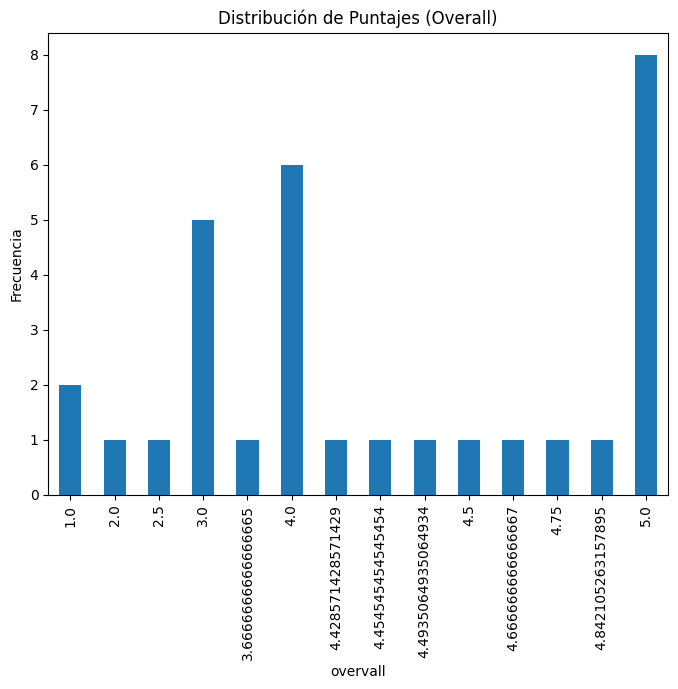

In [62]:


# Crear un gráfico de barras para "overall"
plt.figure(figsize=(8, 6))
df_final['overvall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('overvall')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes (Overall)')
plt.show()


La categoria tiene un puntaje muy alto en valores generales pero no influye en su volumen de venta

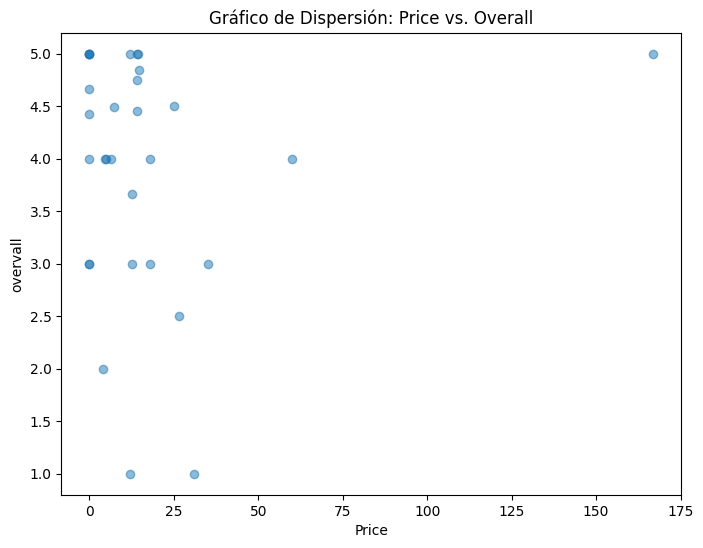

In [67]:
# Crear un gráfico de dispersión para "price" vs. "overall"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['overvall'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('overvall')
plt.title('Gráfico de Dispersión: Price vs. Overall')
plt.show()


Se aprecia que no hay una relacion entre el puntaje y el precio del producto que influya en su venta

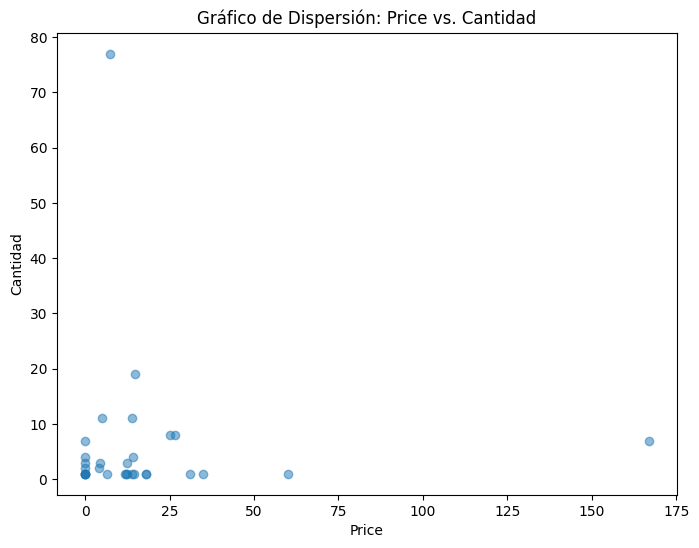

In [66]:
# Crear un gráfico de dispersión para "price" vs. "cantidad"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['cantidad'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Cantidad')
plt.title('Gráfico de Dispersión: Price vs. Cantidad')
plt.show()


Aca se puede apreciar que un producto barato pero que se vendio como mucho volumnen  y puedo recaudar mas que algunos productos con precios mas alto queda revisar si es correcto el valor
por ser un valor atipico

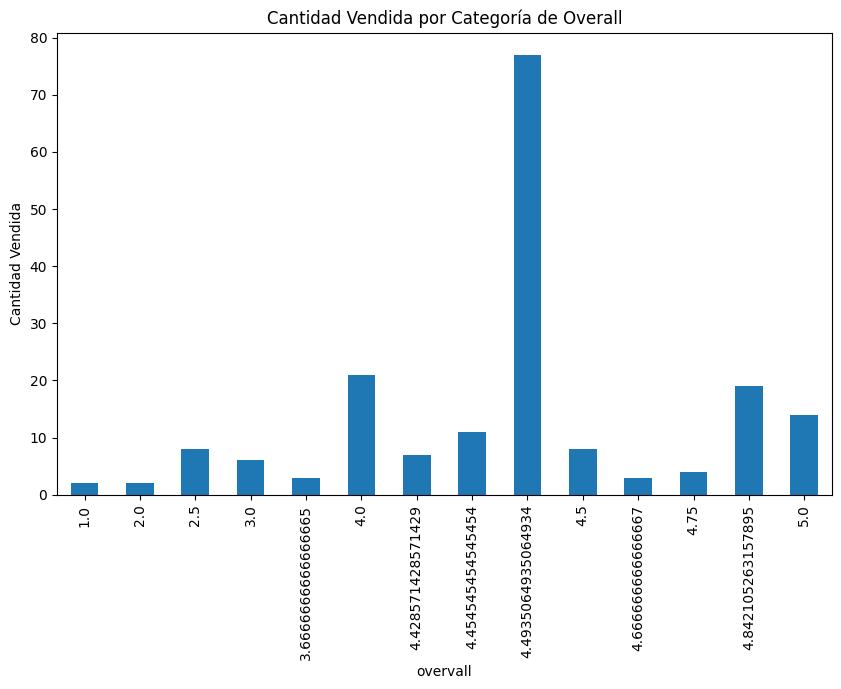

In [69]:
# Crear un gráfico de barras apiladas para contar la cantidad de ventas por categoría de "overall"
plt.figure(figsize=(10, 6))
df_final.groupby('overvall')['cantidad'].sum().plot(kind='bar', stacked=True)
plt.xlabel('overvall')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por Categoría de Overall')
plt.show()


No hay una fuerte relacion pero se puede notar la tendencia uqe cuando el overvall promedio es mayor a 4 es cuando mas se vende el producto

In [70]:
reviews_Tools_and_Home=pd.read_parquet('reviews_Tools_and_Home_Improvement2.parquet')
meta_Tools=pd.read_parquet('meta_Tools_and_Home_Improvement2.parquet')

In [71]:
columna = 'price'
meta_Tools[columna].fillna(0, inplace=True)

In [72]:
fecha_inicio = 1072915200  # 1 de enero de 2004 en formato Unix
fecha_fin = 1420070400      # 31 de diciembre de 2013 en formato Unix

# Filtra las filas dentro del rango de fechas
df_filtrado = reviews_Tools_and_Home[(reviews_Tools_and_Home['unixReviewTime'] >= fecha_inicio) & (reviews_Tools_and_Home['unixReviewTime'] <= fecha_fin)]

In [73]:
cantidad = df_filtrado['asin'].value_counts().reset_index()
cantidad.columns = ['asin', 'cantidad']

# Calcular el promedio de 'overall' para cada 'asin' en df_reviews
promedio_overall = df_filtrado.groupby('asin')['overall'].mean().reset_index()
promedio_overall.columns = ['asin', 'overall']

# Combinar la información de cantidad y promedio_overall con df_meta
df_final = pd.merge(meta_Tools[['asin', 'title', 'price']], cantidad, on='asin', how='left')
df_final = pd.merge(df_final, promedio_overall, on='asin', how='left')

# Renombrar las columnas
df_final.rename(columns={'asin': 'assin', 'title': 'title', 'price': 'price', 'cantidad': 'cantidad', 'overall': 'overvall'}, inplace=True)

# Llenar los valores nulos en 'overvall' con 0 si lo deseas
df_final['overvall'].fillna(0, inplace=True)

In [74]:
df_final = df_final.dropna(subset=['cantidad'])

In [75]:
df_final

,assin,title,price,cantidad,overvall
1,0205062040,NATIONAL NAIL 345002 Marksman Pro Tool,51.31,8.0,4.750000
2,0615247881,Pen Turning with Barry Gross A Visual Guide To...,0.00,1.0,5.000000
3,0955793505,Trend BOOK/CR Complete Routing Techniques and ...,36.33,2.0,3.500000
4,0963469142,Five Crowns,12.04,10.0,5.000000
5,0980966043,&quot;Making Shaker Oval Boxes with Brent Rour...,9.03,1.0,5.000000
...,...,...,...,...,...
280,9896008310,Modern House The Wisdom Woman Tree and Green L...,0.00,1.0,3.000000
281,9896008191,Modern House Autumn Tree and Birds removable V...,0.00,1.0,2.000000
282,9896008388,Modern House Monkey Land with Hot Balloons rem...,0.00,1.0,5.000000
283,9980451327,Geological Hammer - Children's 100g,17.72,2.0,3.000000


In [76]:
# Calcular el monto total por producto
df_final['monto_total'] = df_final['cantidad'] * df_final['price']

# Calcular el total vendido
total_vendido = df_final['cantidad'].sum()

# Calcular el monto total en dinero
monto_total_dinero = df_final['monto_total'].sum()

print(f"El total vendido en el conjunto de datos es: {total_vendido}")
print(f"El monto total en dinero es: ${monto_total_dinero:.2f}")

El total vendido en el conjunto de datos es: 2279.0
El monto total en dinero es: $36766.97


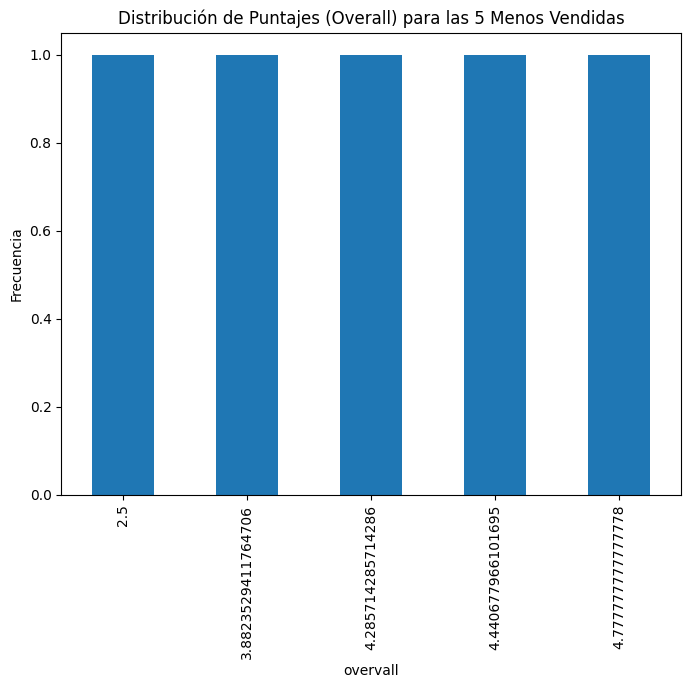

In [79]:
# Crear un gráfico de barras para "overall"
top_5_lowest_sales = df_final['overvall'].value_counts().nsmallest(5).index
filtered_df = df_final[df_final['overvall'].isin(top_5_lowest_sales)]

# Crear un gráfico de barras para las categorías filtradas
plt.figure(figsize=(8, 6))
filtered_df['overvall'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('overvall')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntajes (Overall) para las 5 Menos Vendidas')
plt.show()


Aca se puede ver que tener un buen no asegurea que el producto se venda mucho

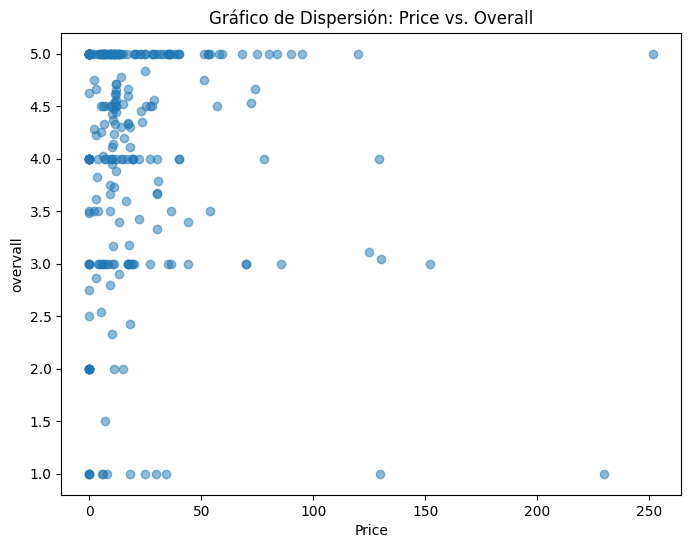

In [80]:
# Crear un gráfico de dispersión para "price" vs. "overall"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['overvall'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('overvall')
plt.title('Gráfico de Dispersión: Price vs. Overall')
plt.show()

Se puede ver que un precio barato vende mas a medida que tiene mayor puntaje que es lo que marca este grafico que esta muy volvado a la izquierda y el overall no influye en el precio

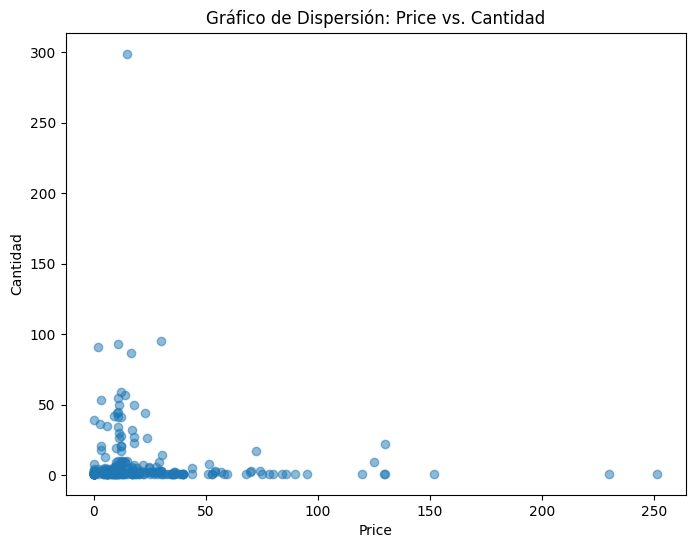

In [81]:
# Crear un gráfico de dispersión para "price" vs. "cantidad"
plt.figure(figsize=(8, 6))
plt.scatter(df_final['price'], df_final['cantidad'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Cantidad')
plt.title('Gráfico de Dispersión: Price vs. Cantidad')
plt.show()

Hay una fuerte concentraciond de precios bajo y una gran cantidad de productos vendidos

<Figure size 1000x600 with 0 Axes>

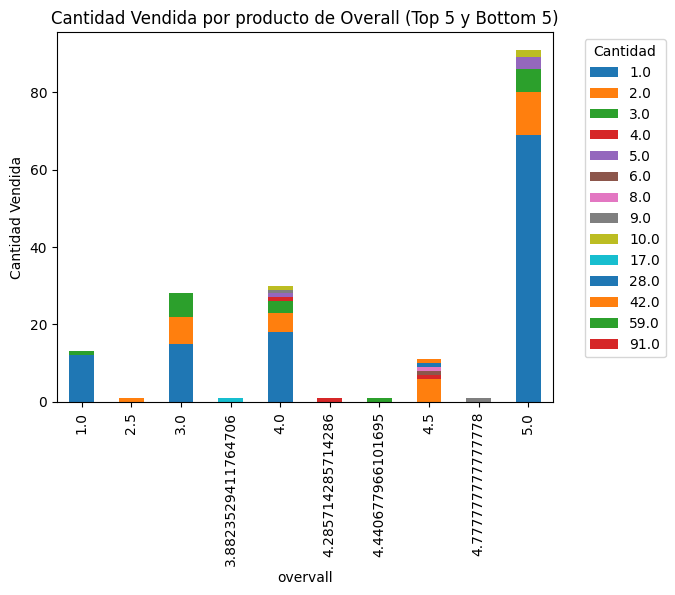

In [85]:
top_5_highest_sales = df_final['overvall'].value_counts().nlargest(5).index

# Obtener las 5 categorías de "overall" menos vendidas
top_5_lowest_sales = df_final['overvall'].value_counts().nsmallest(5).index

# Filtrar el DataFrame para incluir solo las categorías seleccionadas
filtered_df = df_final[df_final['overvall'].isin(top_5_highest_sales) | df_final['overvall'].isin(top_5_lowest_sales)]

# Crear un gráfico de barras apiladas para la cantidad vendida
plt.figure(figsize=(10, 6))
pivot_df = filtered_df.pivot_table(index='overvall', columns='cantidad', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('overvall')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad Vendida por producto de Overall (Top 5 y Bottom 5)')
plt.legend(title='Cantidad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




La categoria Tools_and_Home_Improvement marca que el overvall no marca tendencias en ventas productos muy bien calificado se venden poco y la tendencia son los productos con precios bajos

En lo revisado en esta primera vista a la data ofrezco los siguientes kpis:
1 Aumentar un 10% la venta de productos con alto overvall pero bajo volumen de ventas
Fórmula: Crecimiento de Ventas con Overvall Alto = [(Ventas Actuales con Overvall Alto - Ventas Anteriores con Overvall Alto) / Ventas Anteriores con Overvall Alto] * 100
2  Aumentar las ventas de productos con bajo rendimiento, que actualmente representan menos del 10% del total de ventas, para impulsar el crecimiento en el próximo semestre.
   Tasa de Ventas de Productos con Bajo Rendimiento (%) = (Ventas de Productos con Bajo Rendimiento / Ventas Totales) x 100
3 Crecimiento de Ventas o Recaudación de la Categoría de Menor Rendimiento en un 15% para el siguiente año de las mismas 
4 medir cuán eficiente es el precio de un producto en términos de generar ventas. Un valor alto indicaría que el producto se vende bien en relación con su precio, mientras que un valor bajo podría indicar que el producto es costoso en comparación con las ventas que genera. Esto te ayudaría a identificar productos que necesitan  un ajuste de precio.
Fórmula: Eficiencia de Precio = Cantidad Vendida / Precio
5 Aumentar la sastifacion de los clientes se puede ver por producto en particualar o ver todos los puntajes que dio un cliente y ver cuan contento esta una posibilidad de mediroloseria la siguiente: Satisfacción del Cliente = Promedio de Puntajes (Overvall) de los Productos Vendidos.(Se que no tiene forma de kpi pero con cariño puede ser un kpi)

6 Concentración de Ventas